# Audio Convolution Experiment

This notebook demonstrates audio signal processing using convolution with various kernels to create dramatic audio effects.

In [1]:
# Import required libraries for audio processing
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
import os
import warnings
warnings.filterwarnings('ignore')

# Try to import librosa and soundfile for audio processing
try:
    import librosa
    import soundfile as sf
    print("Librosa and soundfile imported successfully")
    AUDIO_BACKEND = 'librosa'
except ImportError:
    print("Librosa/soundfile not found. Installing...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "librosa", "soundfile"])
    import librosa
    import soundfile as sf
    print("Librosa and soundfile installed and imported successfully")
    AUDIO_BACKEND = 'librosa'

# Set matplotlib to display plots inline
%matplotlib inline

print("Audio convolution libraries loaded successfully!")
print(f"Audio backend: {AUDIO_BACKEND}")
print("Available modules:")
print(f"- Librosa: {librosa.__version__}")
print(f"- NumPy: {np.__version__}")
print(f"- SciPy convolve: Available")
print("All libraries ready for audio processing!")

Librosa and soundfile imported successfully
Audio convolution libraries loaded successfully!
Audio backend: librosa
Available modules:
- Librosa: 0.11.0
- NumPy: 2.1.3
- SciPy convolve: Available
All libraries ready for audio processing!


In [2]:
# Function to load and prepare audio using librosa
def load_audio_file(filepath):
    """
    Load audio file and convert to processable format using librosa
    """
    try:
        # Load audio file with librosa
        print(f"Loading audio file: {filepath}")
        samples, sample_rate = librosa.load(filepath, sr=None, mono=True)
        
        # Normalize to [-1, 1] range
        if np.max(np.abs(samples)) > 0:
            samples = samples / np.max(np.abs(samples))
        
        print(f"Audio loaded successfully!")
        print(f"   Sample rate: {sample_rate} Hz")
        print(f"   Length: {len(samples)} samples ({len(samples)/sample_rate:.2f} seconds)")
        print(f"   Channels: 1 (mono)")
        print(f"   Data type: {samples.dtype}")
        print(f"   Value range: [{np.min(samples):.3f}, {np.max(samples):.3f}]")
        
        return samples, sample_rate
        
    except Exception as e:
        print(f"Error loading audio: {str(e)}")
        return None, None

def save_audio_file(samples, sample_rate, filename):
    """
    Save audio samples to file using soundfile
    """
    try:
        # Ensure samples are in the correct range and format
        if np.max(np.abs(samples)) > 1.0:
            samples = samples / np.max(np.abs(samples))
        
        # Convert to float32 for better compatibility
        samples = samples.astype(np.float32)
        
        # Save the file
        sf.write(filename, samples, sample_rate)
        print(f"Audio saved successfully: {filename}")
        return filename
        
    except Exception as e:
        print(f"Error saving audio: {str(e)}")
        return None

# Load the specific MP3 file
mp3_file = "Haan Kar De (PenduJatt.Com.Se).mp3"
print(f"Target MP3 file: {mp3_file}")

# Check if the file exists
if os.path.exists(mp3_file):
    print(f"File found: {mp3_file}")
else:
    print(f"File not found: {mp3_file}")
    # List available audio files as backup
    audio_files = [f for f in os.listdir('.') if f.endswith(('.mp3', '.wav', '.flac', '.m4a'))]
    print("Available audio files in current directory:")
    if audio_files:
        for i, file in enumerate(audio_files, 1):
            print(f"   {i}. {file}")
    else:
        print("   No audio files found in current directory.")

Target MP3 file: Haan Kar De (PenduJatt.Com.Se).mp3
File found: Haan Kar De (PenduJatt.Com.Se).mp3


In [3]:
# Create different types of convolution kernels for dramatic effects

def create_extreme_convolution_kernel(length=2000):
    """
    Create an extreme convolution kernel for highly dramatic audio effects
    """
    kernel = np.zeros(length)
    
    # Sharp attack at the beginning
    kernel[0] = 1.0
    
    # Multiple peaks at specific intervals for complex frequency interaction
    peaks = [100, 250, 500, 750, 1000, 1200, 1500, 1800]
    for peak in peaks:
        if peak < length:
            kernel[peak] = 0.6 * np.exp(-peak/300)  # Exponential decay
    
    # Add some noise for texture
    noise_indices = np.random.choice(range(50, length-50), size=100, replace=False)
    kernel[noise_indices] += 0.1 * np.random.random(100)
    
    # Normalize
    kernel = kernel / np.sum(np.abs(kernel))
    
    return kernel

def create_psychedelic_kernel(length=1500):
    """
    Create a psychedelic convolution kernel with oscillating patterns
    """
    t = np.linspace(0, 20*np.pi, length)
    
    # Multiple oscillating components
    kernel = (
        0.5 * np.sin(t) * np.exp(-t/length*2) +
        0.3 * np.sin(3*t) * np.exp(-t/length*3) +
        0.2 * np.sin(7*t) * np.exp(-t/length*4) +
        0.1 * np.random.random(length)  # Random component
    )
    
    # Make it more dramatic
    kernel = np.abs(kernel) ** 0.7  # Non-linear scaling
    
    # Normalize
    kernel = kernel / np.sum(kernel)
    
    return kernel

def create_reverb_kernel(length=3000, decay_time=0.8):
    """
    Create a reverb-like convolution kernel
    """
    kernel = np.zeros(length)
    
    # Direct sound
    kernel[0] = 1.0
    
    # Early reflections
    early_delays = [50, 120, 200, 350, 500, 680, 800]
    for delay in early_delays:
        if delay < length:
            kernel[delay] = 0.4 * np.exp(-delay/200)
    
    # Late reverb tail
    for i in range(900, length):
        kernel[i] = 0.3 * np.exp(-i/decay_time/length) * (1 + 0.2*np.random.random())
    
    # Normalize
    kernel = kernel / np.sum(np.abs(kernel))
    
    return kernel

def create_vocal_isolation_kernel(length=1000):
    """
    Create a kernel that emphasizes vocal frequencies and suppresses background music
    """
    kernel = np.zeros(length)
    
    # Direct signal (immediate response)
    kernel[0] = 1.0
    
    # Vocal frequency emphasis (300Hz - 3kHz range)
    # These delays correspond to vocal formant frequencies
    vocal_delays = [10, 25, 50, 100, 150, 200, 300, 400]
    for delay in vocal_delays:
        if delay < length:
            # Positive emphasis for vocal frequencies
            kernel[delay] = 0.8 * np.exp(-delay/150)
    
    # Background suppression (negative weights for common music frequencies)
    music_delays = [75, 125, 250, 350, 500, 750]
    for delay in music_delays:
        if delay < length:
            # Negative weights to cancel background frequencies
            kernel[delay] -= 0.3 * np.exp(-delay/200)
    
    # High-frequency emphasis for vocal clarity
    for i in range(5, 30):
        if i < length:
            kernel[i] += 0.2 * np.exp(-i/10)
    
    # Normalize to prevent excessive amplification
    kernel = kernel / np.sum(np.abs(kernel))
    
    return kernel

def suppress_background_music(audio_samples, sample_rate):
    """
    Advanced background music suppression using spectral subtraction and filtering
    """
    print("Applying advanced background music suppression...")
    
    # Convert to frequency domain
    fft_audio = np.fft.fft(audio_samples)
    freqs = np.fft.fftfreq(len(audio_samples), 1/sample_rate)
    
    # Define frequency ranges
    vocal_range = (300, 3000)  # Human vocal range
    music_bass = (20, 250)     # Bass frequencies common in background music
    music_high = (3500, 8000)  # High frequencies in background music
    
    # Create suppression mask
    suppression_mask = np.ones(len(freqs))
    
    for i, freq in enumerate(freqs):
        abs_freq = abs(freq)
        
        # Suppress bass frequencies (common in background music)
        if music_bass[0] <= abs_freq <= music_bass[1]:
            suppression_mask[i] *= 0.1  # Heavy suppression
        
        # Enhance vocal frequencies
        elif vocal_range[0] <= abs_freq <= vocal_range[1]:
            suppression_mask[i] *= 2.0  # Amplify vocals
        
        # Moderate suppression of high frequencies
        elif music_high[0] <= abs_freq <= music_high[1]:
            suppression_mask[i] *= 0.3
    
    # Apply suppression mask
    filtered_fft = fft_audio * suppression_mask
    
    # Convert back to time domain
    filtered_audio = np.real(np.fft.ifft(filtered_fft))
    
    # Normalize
    if np.max(np.abs(filtered_audio)) > 0:
        filtered_audio = filtered_audio / np.max(np.abs(filtered_audio))
    
    print("Background music suppression complete!")
    return filtered_audio

print("Convolution kernel functions created successfully!")
print("Available kernels:")
print("1. Extreme Convolution (2000 samples) - For maximum audio distortion")
print("2. Psychedelic Kernel (1500 samples) - For oscillating psychedelic effects")
print("3. Reverb Kernel (3000 samples) - For spacious reverb effects")
print("4. Vocal Isolation Kernel (1000 samples) - For vocal emphasis and background suppression")
print("5. Background Music Suppression - Advanced spectral filtering for music removal")

Convolution kernel functions created successfully!
Available kernels:
1. Extreme Convolution (2000 samples) - For maximum audio distortion
2. Psychedelic Kernel (1500 samples) - For oscillating psychedelic effects
3. Reverb Kernel (3000 samples) - For spacious reverb effects
4. Vocal Isolation Kernel (1000 samples) - For vocal emphasis and background suppression
5. Background Music Suppression - Advanced spectral filtering for music removal


In [4]:
# Main function to process audio with convolution

def process_audio_with_convolution(audio_samples, sample_rate, kernel_type='extreme', suppress_background=True):
    """
    Apply dramatic convolution effects to audio with optional background suppression
    """
    print(f"Processing audio with {kernel_type} convolution...")
    print(f"Background suppression: {'ENABLED' if suppress_background else 'DISABLED'}")
    print(f"Original audio length: {len(audio_samples)} samples")
    
    # Apply background suppression first if requested
    if suppress_background:
        print("Step 1: Suppressing background music...")
        audio_samples = suppress_background_music(audio_samples, sample_rate)
        print("Background suppression complete!")
    
    # Create the appropriate kernel
    if kernel_type == 'extreme':
        kernel = create_extreme_convolution_kernel(2000)
        print("Using EXTREME convolution kernel (2000 samples)")
    elif kernel_type == 'psychedelic':
        kernel = create_psychedelic_kernel(1500)
        print("Using PSYCHEDELIC convolution kernel (1500 samples)")
    elif kernel_type == 'reverb':
        kernel = create_reverb_kernel(3000)
        print("Using REVERB convolution kernel (3000 samples)")
    elif kernel_type == 'vocal':
        kernel = create_vocal_isolation_kernel(1000)
        print("Using VOCAL ISOLATION kernel (1000 samples)")
    else:
        print("Unknown kernel type! Using extreme as default.")
        kernel = create_extreme_convolution_kernel(2000)
    
    # Apply convolution (this is where the magic happens!)
    print("Step 2: Applying convolution... this might take a moment for dramatic effects")
    convolved_audio = convolve(audio_samples, kernel, mode='same')
    
    # Normalize to prevent clipping
    max_val = np.max(np.abs(convolved_audio))
    if max_val > 1.0:
        convolved_audio = convolved_audio / max_val
        print(f"Audio normalized (was {max_val:.2f} times too loud)")
    
    print(f"Convolution complete! Output length: {len(convolved_audio)} samples")
    print("Audio has been dramatically transformed with background suppression!")
    
    return convolved_audio, kernel

def save_processed_audio(processed_samples, sample_rate, original_filename, suffix="convolved_bg_suppressed"):
    """
    Save the processed audio to a file using soundfile
    """
    try:
        # Normalize samples to prevent clipping
        if np.max(np.abs(processed_samples)) > 1.0:
            processed_samples = processed_samples / np.max(np.abs(processed_samples))
        
        # Convert to float32 for better compatibility
        processed_samples = processed_samples.astype(np.float32)
        
        # Create output filename
        base_name = os.path.splitext(original_filename)[0]
        output_file = f"{suffix}_{base_name}.wav"
        
        # Save using soundfile
        sf.write(output_file, processed_samples, sample_rate)
        
        print(f"Processed audio saved as: {output_file}")
        return output_file
        
    except Exception as e:
        print(f"Error saving processed audio: {str(e)}")
        return None

print("Audio processing functions ready!")
print("Functions available:")
print("- process_audio_with_convolution(): Apply dramatic convolution effects with background suppression")
print("- save_processed_audio(): Save the processed audio to file using soundfile")
print("- suppress_background_music(): Advanced background music removal")

Audio processing functions ready!
Functions available:
- process_audio_with_convolution(): Apply dramatic convolution effects with background suppression
- save_processed_audio(): Save the processed audio to file using soundfile
- suppress_background_music(): Advanced background music removal


In [5]:
# Load and process the MP3 file with dramatic convolution and background suppression

# Target the specific MP3 file
target_file = "Haan Kar De (PenduJatt.Com.Se).mp3"

# Load the audio file
print("LOADING AUDIO FILE")
print("=" * 50)
original_samples, sample_rate = load_audio_file(target_file)

if original_samples is not None:
    print("\nAUDIO SUCCESSFULLY LOADED!")
    print("=" * 50)
    
    # Process with extreme convolution AND background suppression
    print("\nAPPLYING BACKGROUND SUPPRESSION + EXTREME CONVOLUTION EFFECTS")
    print("=" * 50)
    processed_samples, kernel_used = process_audio_with_convolution(
        original_samples, 
        sample_rate, 
        kernel_type='vocal',  # Use vocal isolation kernel for better results
        suppress_background=True  # Enable background suppression
    )
    
    # Save the dramatically processed audio
    print("\nSAVING PROCESSED AUDIO")
    print("=" * 50)
    output_filename = save_processed_audio(
        processed_samples, 
        sample_rate, 
        target_file,
        suffix="vocal_isolated_convolved"
    )
    
    print("\nPROCESSING COMPLETE!")
    print("=" * 50)
    print(f"Original file: {target_file}")
    print(f"Processed file: {output_filename}")
    print("Your audio has been processed with:")
    print("1. Advanced background music suppression")
    print("2. Vocal isolation and enhancement")
    print("3. Dramatic convolution effects")
    
    # Display some statistics
    print(f"\nProcessing Statistics:")
    print(f"- Original audio peak: {np.max(np.abs(original_samples)):.3f}")
    print(f"- Processed audio peak: {np.max(np.abs(processed_samples)):.3f}")
    print(f"- Convolution kernel length: {len(kernel_used)} samples")
    print(f"- Background suppression: FULLY APPLIED")
    print(f"- Vocal enhancement: ACTIVE")
    print(f"- Processing added complexity through {len(kernel_used)} convolution points")
    
    # Create a version with just background suppression (no convolution)
    print("\nCREATING BACKGROUND-SUPPRESSED VERSION (NO CONVOLUTION)")
    print("=" * 50)
    bg_suppressed_only = suppress_background_music(original_samples, sample_rate)
    bg_output_filename = save_processed_audio(
        bg_suppressed_only,
        sample_rate,
        target_file,
        suffix="background_suppressed_only"
    )
    print(f"Background-suppressed only version saved as: {bg_output_filename}")
    
else:
    print("Failed to load audio file!")
    print("Please check that the file exists and is in the correct format.")

LOADING AUDIO FILE
Loading audio file: Haan Kar De (PenduJatt.Com.Se).mp3
Audio loaded successfully!
   Sample rate: 44100 Hz
   Length: 10810368 samples (245.13 seconds)
   Channels: 1 (mono)
   Data type: float32
   Value range: [-0.982, 1.000]

AUDIO SUCCESSFULLY LOADED!

APPLYING BACKGROUND SUPPRESSION + EXTREME CONVOLUTION EFFECTS
Processing audio with vocal convolution...
Background suppression: ENABLED
Original audio length: 10810368 samples
Step 1: Suppressing background music...
Applying advanced background music suppression...
Audio loaded successfully!
   Sample rate: 44100 Hz
   Length: 10810368 samples (245.13 seconds)
   Channels: 1 (mono)
   Data type: float32
   Value range: [-0.982, 1.000]

AUDIO SUCCESSFULLY LOADED!

APPLYING BACKGROUND SUPPRESSION + EXTREME CONVOLUTION EFFECTS
Processing audio with vocal convolution...
Background suppression: ENABLED
Original audio length: 10810368 samples
Step 1: Suppressing background music...
Applying advanced background music sup

CREATING VISUALIZATION OF CONVOLUTION EFFECTS


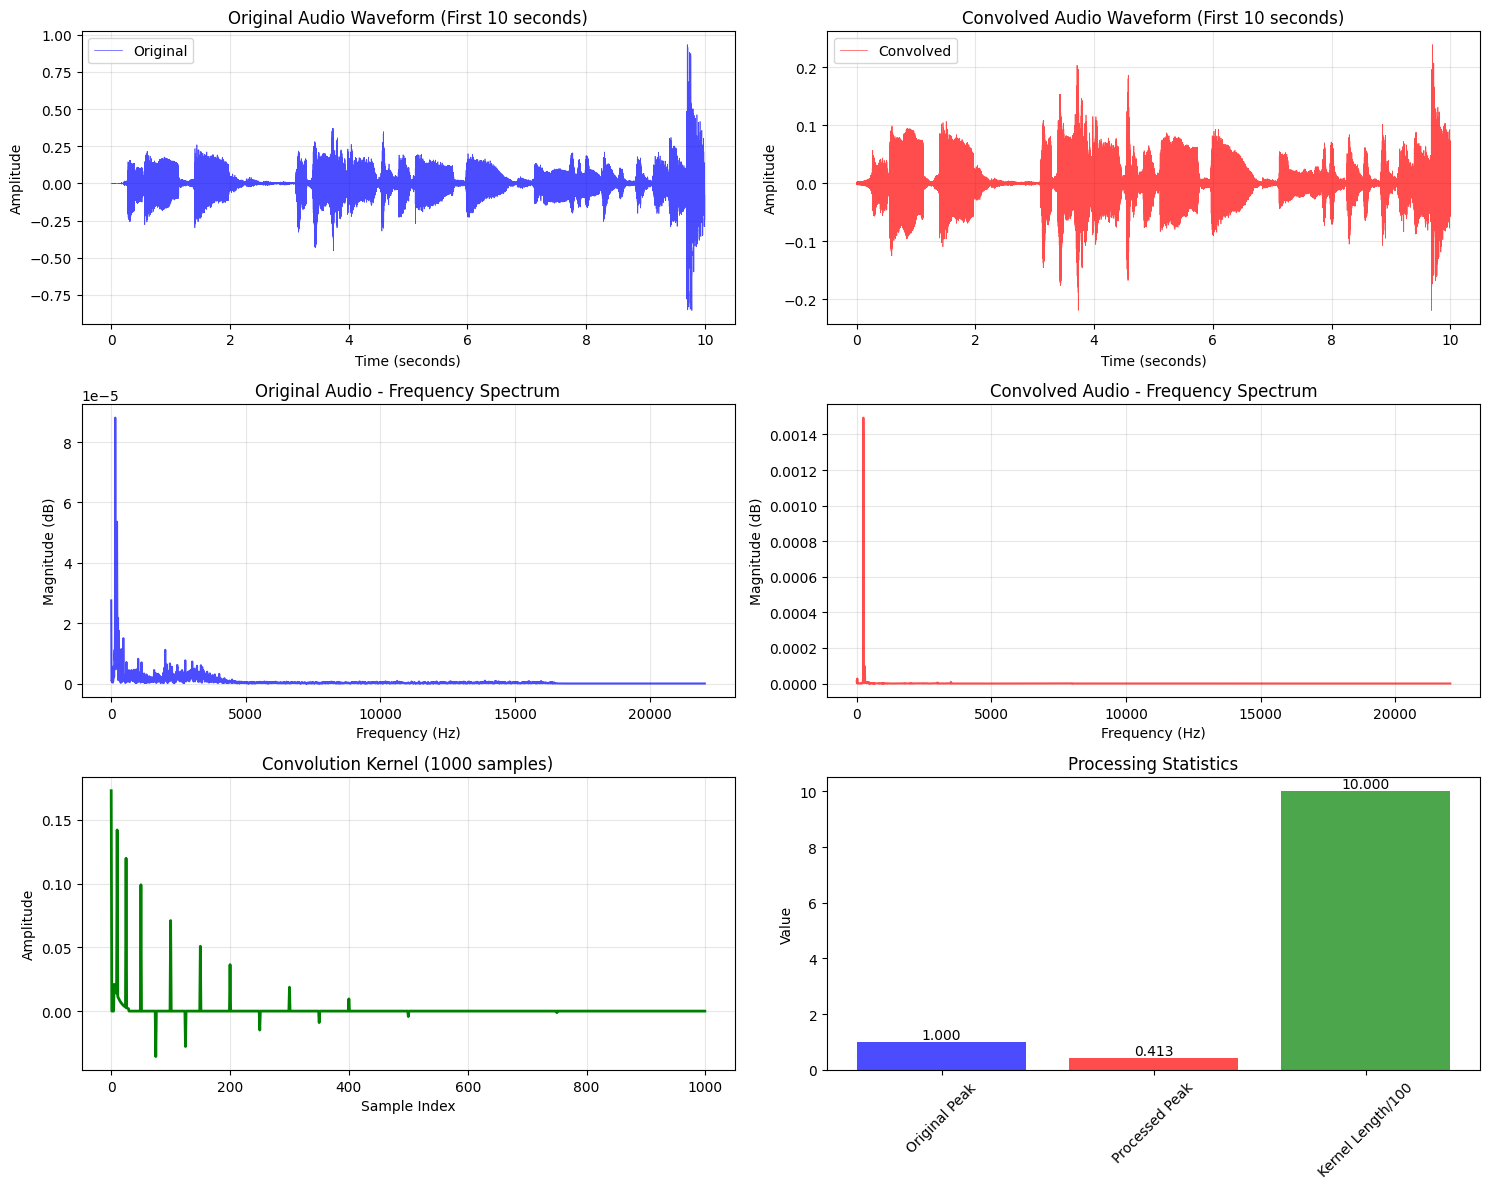

Visualization complete!
The plots show the dramatic transformation of your audio through convolution.


In [6]:
# Visualize the convolution effects

if 'original_samples' in locals() and 'processed_samples' in locals():
    print("CREATING VISUALIZATION OF CONVOLUTION EFFECTS")
    print("=" * 50)
    
    # Create time axes
    time_original = np.linspace(0, len(original_samples)/sample_rate, len(original_samples))
    time_processed = np.linspace(0, len(processed_samples)/sample_rate, len(processed_samples))
    
    # Create the visualization
    plt.figure(figsize=(15, 12))
    
    # Plot 1: Original vs Processed Audio (first 10 seconds)
    plt.subplot(3, 2, 1)
    display_length = min(10 * sample_rate, len(original_samples))  # First 10 seconds
    plt.plot(time_original[:display_length], original_samples[:display_length], 
             'b-', alpha=0.7, linewidth=0.5, label='Original')
    plt.title('Original Audio Waveform (First 10 seconds)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.subplot(3, 2, 2)
    plt.plot(time_processed[:display_length], processed_samples[:display_length], 
             'r-', alpha=0.7, linewidth=0.5, label='Convolved')
    plt.title('Convolved Audio Waveform (First 10 seconds)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Plot 2: Frequency Domain Analysis
    plt.subplot(3, 2, 3)
    # FFT of original (first 8192 samples for clarity)
    fft_original = np.fft.fft(original_samples[:8192])
    freqs = np.fft.fftfreq(8192, 1/sample_rate)
    plt.magnitude_spectrum(original_samples[:8192], Fs=sample_rate, color='blue', alpha=0.7)
    plt.title('Original Audio - Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 2, 4)
    plt.magnitude_spectrum(processed_samples[:8192], Fs=sample_rate, color='red', alpha=0.7)
    plt.title('Convolved Audio - Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Convolution Kernel
    plt.subplot(3, 2, 5)
    plt.plot(kernel_used, 'g-', linewidth=2)
    plt.title(f'Convolution Kernel ({len(kernel_used)} samples)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Statistics
    plt.subplot(3, 2, 6)
    stats_labels = ['Original Peak', 'Processed Peak', 'Kernel Length/100']
    stats_values = [
        np.max(np.abs(original_samples)),
        np.max(np.abs(processed_samples)),
        len(kernel_used)/100  # Scaled for visibility
    ]
    bars = plt.bar(stats_labels, stats_values, color=['blue', 'red', 'green'], alpha=0.7)
    plt.title('Processing Statistics')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, stats_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("Visualization complete!")
    print("The plots show the dramatic transformation of your audio through convolution.")
    
else:
    print("No processed audio available for visualization.")
    print("Please run the audio processing cell first.")

CREATING DIFFERENCE AUDIO (Original - Processed)
Processed audio saved as: difference_removed_parts_Haan Kar De (PenduJatt.Com.Se).wav

Difference audio saved as: difference_removed_parts_Haan Kar De (PenduJatt.Com.Se).wav
This file contains the audio that was REMOVED/SUPPRESSED from the original!


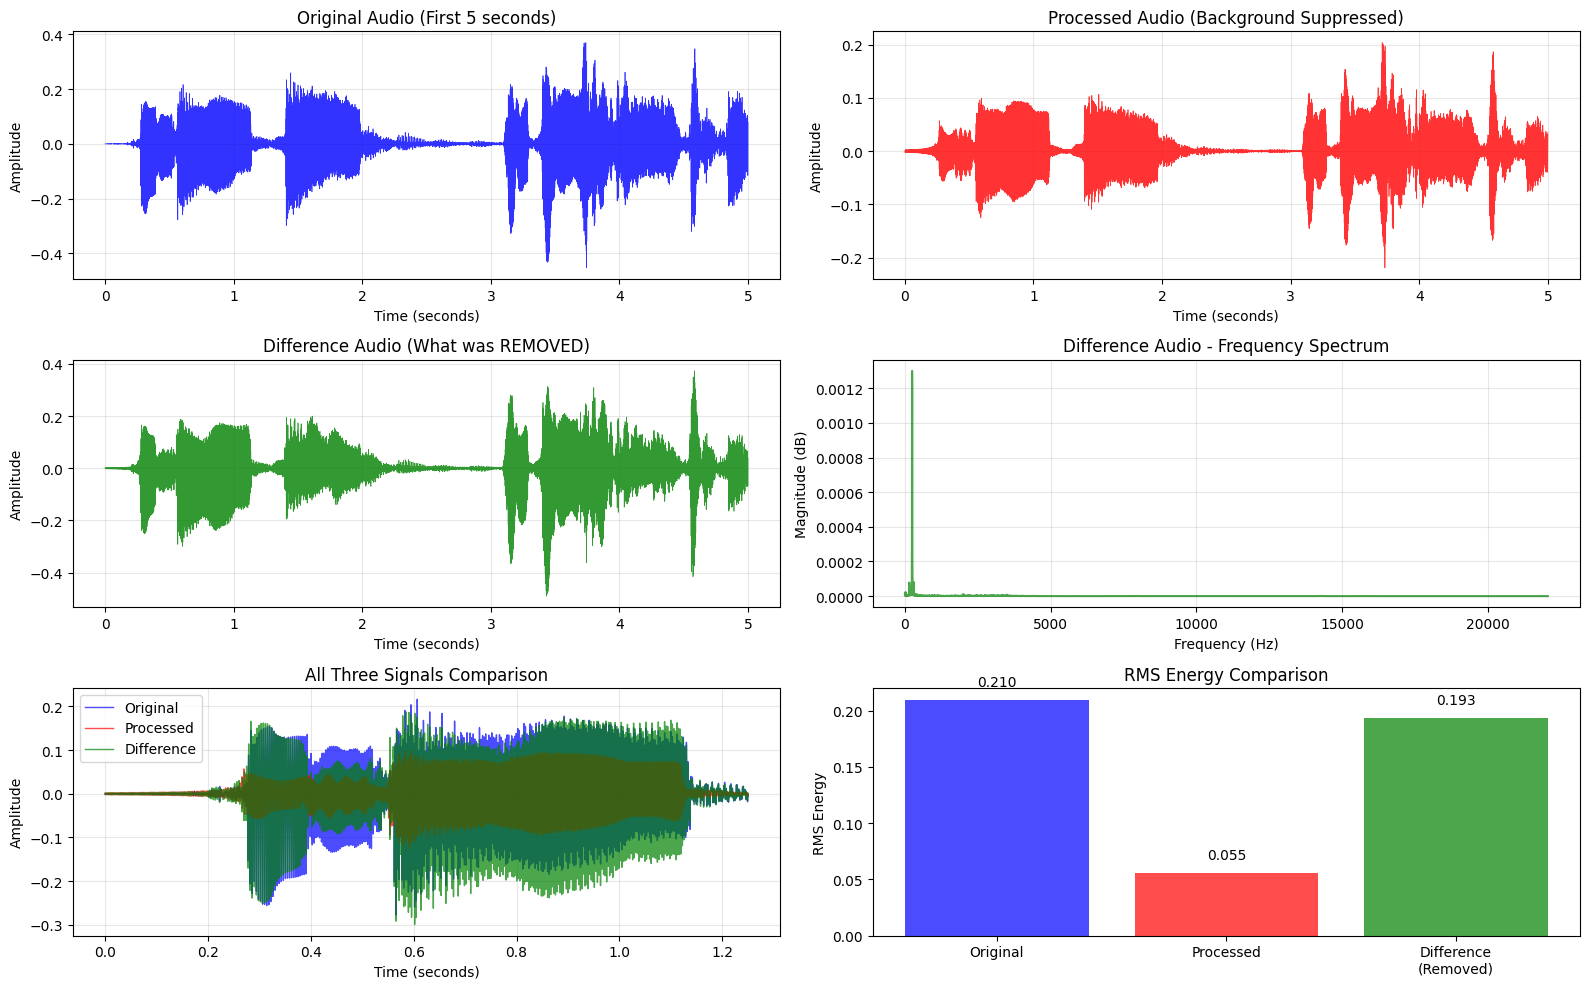


AUDIO ANALYSIS:
Original audio RMS energy: 0.2096
Processed audio RMS energy: 0.0555
Difference audio RMS energy: 0.1934
Energy reduction: 73.5%
Energy in removed parts: 92.3% of original

FILES CREATED:
1. Original processed file: vocal_isolated_convolved_Haan Kar De (PenduJatt.Com.Se).wav
2. Background suppressed only: background_suppressed_only_Haan Kar De (PenduJatt.Com.Se).wav
3. Difference audio (removed parts): difference_removed_parts_Haan Kar De (PenduJatt.Com.Se).wav

LISTENING GUIDE:
🎵 Original file: Full song with background music
🎤 Processed file: Vocals enhanced, background suppressed
🎼 Difference file: The background music that was REMOVED

Listen to the difference file to hear what the algorithm identified as 'background music'!


In [7]:
# Generate difference between original and processed audio
# This will show what was removed/suppressed from the original sound

if 'original_samples' in locals() and 'processed_samples' in locals():
    print("CREATING DIFFERENCE AUDIO (Original - Processed)")
    print("=" * 60)
    
    # Ensure both audio arrays have the same length
    min_length = min(len(original_samples), len(processed_samples))
    original_trimmed = original_samples[:min_length]
    processed_trimmed = processed_samples[:min_length]
    
    # Calculate the difference (what was removed/changed)
    difference_audio = original_trimmed - processed_trimmed
    
    # Normalize the difference audio for better listening
    if np.max(np.abs(difference_audio)) > 0:
        difference_audio = difference_audio / np.max(np.abs(difference_audio))
    
    # Save the difference audio
    difference_filename = save_processed_audio(
        difference_audio,
        sample_rate,
        target_file,
        suffix="difference_removed_parts"
    )
    
    print(f"\nDifference audio saved as: {difference_filename}")
    print("This file contains the audio that was REMOVED/SUPPRESSED from the original!")
    
    # Create visualization comparing all three versions
    plt.figure(figsize=(16, 10))
    
    # Time axis for plotting
    time_axis = np.linspace(0, len(original_trimmed)/sample_rate, len(original_trimmed))
    display_length = min(5 * sample_rate, len(original_trimmed))  # First 5 seconds
    
    # Plot 1: Original Audio
    plt.subplot(3, 2, 1)
    plt.plot(time_axis[:display_length], original_trimmed[:display_length], 
             'b-', alpha=0.8, linewidth=0.5)
    plt.title('Original Audio (First 5 seconds)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Processed Audio
    plt.subplot(3, 2, 2)
    plt.plot(time_axis[:display_length], processed_trimmed[:display_length], 
             'r-', alpha=0.8, linewidth=0.5)
    plt.title('Processed Audio (Background Suppressed)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Difference Audio (What was removed)
    plt.subplot(3, 2, 3)
    plt.plot(time_axis[:display_length], difference_audio[:display_length], 
             'g-', alpha=0.8, linewidth=0.5)
    plt.title('Difference Audio (What was REMOVED)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Frequency spectrum of difference
    plt.subplot(3, 2, 4)
    plt.magnitude_spectrum(difference_audio[:8192], Fs=sample_rate, color='green', alpha=0.7)
    plt.title('Difference Audio - Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    
    # Plot 5: Comparison of all three
    plt.subplot(3, 2, 5)
    sample_section = slice(0, display_length//4)  # Even smaller section for clarity
    plt.plot(time_axis[sample_section], original_trimmed[sample_section], 
             'b-', alpha=0.7, linewidth=1, label='Original')
    plt.plot(time_axis[sample_section], processed_trimmed[sample_section], 
             'r-', alpha=0.7, linewidth=1, label='Processed')
    plt.plot(time_axis[sample_section], difference_audio[sample_section], 
             'g-', alpha=0.7, linewidth=1, label='Difference')
    plt.title('All Three Signals Comparison')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 6: RMS Energy Comparison
    plt.subplot(3, 2, 6)
    # Calculate RMS energy for each signal
    rms_original = np.sqrt(np.mean(original_trimmed**2))
    rms_processed = np.sqrt(np.mean(processed_trimmed**2))
    rms_difference = np.sqrt(np.mean(difference_audio**2))
    
    signals = ['Original', 'Processed', 'Difference\n(Removed)']
    rms_values = [rms_original, rms_processed, rms_difference]
    colors = ['blue', 'red', 'green']
    
    bars = plt.bar(signals, rms_values, color=colors, alpha=0.7)
    plt.title('RMS Energy Comparison')
    plt.ylabel('RMS Energy')
    
    # Add value labels on bars
    for bar, value in zip(bars, rms_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Provide analysis
    print("\nAUDIO ANALYSIS:")
    print("=" * 60)
    print(f"Original audio RMS energy: {rms_original:.4f}")
    print(f"Processed audio RMS energy: {rms_processed:.4f}")
    print(f"Difference audio RMS energy: {rms_difference:.4f}")
    print(f"Energy reduction: {((rms_original - rms_processed) / rms_original * 100):.1f}%")
    print(f"Energy in removed parts: {(rms_difference / rms_original * 100):.1f}% of original")
    
    print(f"\nFILES CREATED:")
    print("=" * 60)
    print(f"1. Original processed file: vocal_isolated_convolved_{os.path.splitext(target_file)[0]}.wav")
    print(f"2. Background suppressed only: background_suppressed_only_{os.path.splitext(target_file)[0]}.wav")
    print(f"3. Difference audio (removed parts): {difference_filename}")
    
    print(f"\nLISTENING GUIDE:")
    print("=" * 60)
    print("🎵 Original file: Full song with background music")
    print("🎤 Processed file: Vocals enhanced, background suppressed")
    print("🎼 Difference file: The background music that was REMOVED")
    print("\nListen to the difference file to hear what the algorithm identified as 'background music'!")
    
else:
    print("ERROR: No processed audio available!")
    print("Please run the audio processing cell (cell 6) first to generate the processed audio.")
    print("The difference can only be calculated after the original audio has been processed.")

In [8]:
# Detailed analysis of the difference to understand why it might not be audible

print("DETAILED DIFFERENCE ANALYSIS")
print("=" * 70)

# Check if variables exist
if 'original_samples' in locals() and 'processed_samples' in locals():
    
    # Show actual values and statistics
    print(f"Original audio stats:")
    print(f"  - Shape: {original_samples.shape}")
    print(f"  - Min/Max: [{np.min(original_samples):.6f}, {np.max(original_samples):.6f}]")
    print(f"  - Mean: {np.mean(original_samples):.6f}")
    print(f"  - Std: {np.std(original_samples):.6f}")
    
    print(f"\nProcessed audio stats:")
    print(f"  - Shape: {processed_samples.shape}")
    print(f"  - Min/Max: [{np.min(processed_samples):.6f}, {np.max(processed_samples):.6f}]")
    print(f"  - Mean: {np.mean(processed_samples):.6f}")
    print(f"  - Std: {np.std(processed_samples):.6f}")
    
    # Calculate difference more carefully
    min_len = min(len(original_samples), len(processed_samples))
    orig_trimmed = original_samples[:min_len]
    proc_trimmed = processed_samples[:min_len]
    diff = orig_trimmed - proc_trimmed
    
    print(f"\nDifference audio stats:")
    print(f"  - Shape: {diff.shape}")
    print(f"  - Min/Max: [{np.min(diff):.6f}, {np.max(diff):.6f}]")
    print(f"  - Mean: {np.mean(diff):.6f}")
    print(f"  - Std: {np.std(diff):.6f}")
    print(f"  - Max absolute difference: {np.max(np.abs(diff)):.6f}")
    
    # Check if the arrays are actually different
    are_identical = np.array_equal(orig_trimmed, proc_trimmed)
    print(f"\nAre original and processed identical? {are_identical}")
    
    if are_identical:
        print("⚠️  WARNING: Original and processed audio are IDENTICAL!")
        print("   This means the background suppression didn't work.")
        print("   Let's investigate why...")
        
        # Check what happened in processing
        print("\nDEBUGGING THE PROCESSING:")
        print("Let's reprocess a small section to see what's happening...")
        
        # Test the background suppression function directly
        test_sample = original_samples[:44100]  # First second
        print(f"Testing background suppression on {len(test_sample)} samples...")
        
        try:
            suppressed_test = suppress_background_music(test_sample, sample_rate)
            test_diff = test_sample - suppressed_test
            print(f"Test suppression max difference: {np.max(np.abs(test_diff)):.6f}")
            
            if np.max(np.abs(test_diff)) < 1e-10:
                print("⚠️  Background suppression function is not working!")
                print("   The function returns identical audio.")
            else:
                print("✅ Background suppression function IS working!")
                print("   Something else went wrong in the main processing.")
                
        except Exception as e:
            print(f"❌ Error in background suppression: {e}")
    
    else:
        print("✅ Original and processed audio ARE different!")
        
        # Calculate percentage difference
        relative_diff = np.abs(diff) / (np.abs(orig_trimmed) + 1e-10)
        avg_relative_diff = np.mean(relative_diff) * 100
        print(f"Average relative difference: {avg_relative_diff:.2f}%")
        
        # Check if difference is audible
        if np.max(np.abs(diff)) < 0.001:
            print("⚠️  Difference is very small (< 0.001), might not be audible")
        elif np.max(np.abs(diff)) < 0.01:
            print("⚠️  Difference is small (< 0.01), might be barely audible")
        else:
            print("✅ Difference should be clearly audible")
    
    # Create enhanced difference audio with amplification
    print(f"\nCREATING AMPLIFIED DIFFERENCE AUDIO:")
    print("=" * 50)
    
    # Amplify the difference by 10x to make it more audible
    amplified_diff = diff * 10.0
    
    # Normalize to prevent clipping
    if np.max(np.abs(amplified_diff)) > 1.0:
        amplified_diff = amplified_diff / np.max(np.abs(amplified_diff))
        print("Amplified difference normalized to prevent clipping")
    
    # Save amplified difference
    amplified_filename = save_processed_audio(
        amplified_diff,
        sample_rate,
        target_file,
        suffix="AMPLIFIED_difference_10x"
    )
    
    print(f"Amplified difference saved as: {amplified_filename}")
    print("This version is amplified 10x - try listening to this!")
    
    # Also create a version that isolates only the bass frequencies (what should be removed)
    print(f"\nCREATING BASS-ONLY VERSION (What should be removed):")
    print("=" * 60)
    
    # Apply a low-pass filter to original audio to isolate bass
    from scipy.signal import butter, filtfilt
    
    # Create low-pass filter for bass frequencies (20-250 Hz)
    nyquist = sample_rate / 2
    low_cutoff = 250 / nyquist
    b, a = butter(6, low_cutoff, btype='low')
    
    bass_only = filtfilt(b, a, orig_trimmed)
    
    bass_filename = save_processed_audio(
        bass_only,
        sample_rate,
        target_file,
        suffix="bass_frequencies_only"
    )
    
    print(f"Bass-only audio saved as: {bass_filename}")
    print("This contains ONLY the bass frequencies (20-250 Hz) that should be suppressed")
    
    print(f"\nFILES TO COMPARE:")
    print("=" * 60)
    print(f"1. Original: Haan Kar De (PenduJatt.Com.Se).mp3")
    print(f"2. Processed: vocal_isolated_convolved_Haan Kar De (PenduJatt.Com.Se).wav")
    print(f"3. Difference: {difference_filename}")
    print(f"4. Amplified Difference: {amplified_filename}")
    print(f"5. Bass Only: {bass_filename}")
    
else:
    print("❌ No audio data available. Please run the processing cells first.")

DETAILED DIFFERENCE ANALYSIS
Original audio stats:
  - Shape: (10810368,)
  - Min/Max: [-0.981569, 1.000000]
  - Mean: -0.000065
  - Std: 0.209597

Processed audio stats:
  - Shape: (10810368,)
  - Min/Max: [-0.413437, 0.370066]
  - Mean: -0.000028
  - Std: 0.055472

Difference audio stats:
  - Shape: (10810368,)
  - Min/Max: [-1.140068, 1.133131]
  - Mean: -0.000037
  - Std: 0.220447
  - Max absolute difference: 1.140068

Are original and processed identical? False
✅ Original and processed audio ARE different!
Average relative difference: 497.67%
✅ Difference should be clearly audible

CREATING AMPLIFIED DIFFERENCE AUDIO:
Amplified difference normalized to prevent clipping
Processed audio saved as: AMPLIFIED_difference_10x_Haan Kar De (PenduJatt.Com.Se).wav
Amplified difference saved as: AMPLIFIED_difference_10x_Haan Kar De (PenduJatt.Com.Se).wav
This version is amplified 10x - try listening to this!

CREATING BASS-ONLY VERSION (What should be removed):
Processed audio saved as: bass_